<a href="https://colab.research.google.com/github/kroone/datacamp/blob/master/datacamp_Fundamentals_of_Bayesian_Data_Analysis_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Binomial Manual
prop_success <- 0.42
n_zombies <- 100

# Simulating data
data <- c()
for(zombie in 1:n_zombies) {
  data[zombie] <- runif(1, min = 0, max = 1) < prop_success
}
data <- as.numeric(data)
print(data)
print(sum(data))

  [1] 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 [38] 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1
 [75] 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1
[1] 45


In [ ]:
#Binomial Included
rbinom(n = 1, size = 100, prob = 0.42)

[1] 45

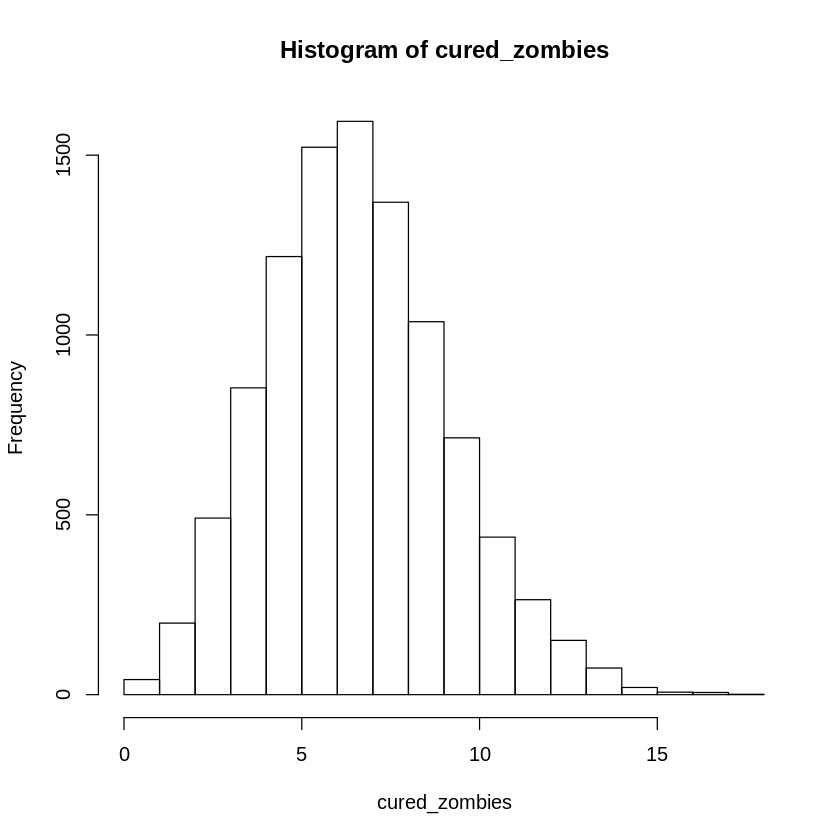

In [ ]:
#run 10000x, how many of 100 zombies cured if medication p succesfull
cured_zombies <- rbinom(n=10000, size=100, prob = 0.07)
hist(cured_zombies)

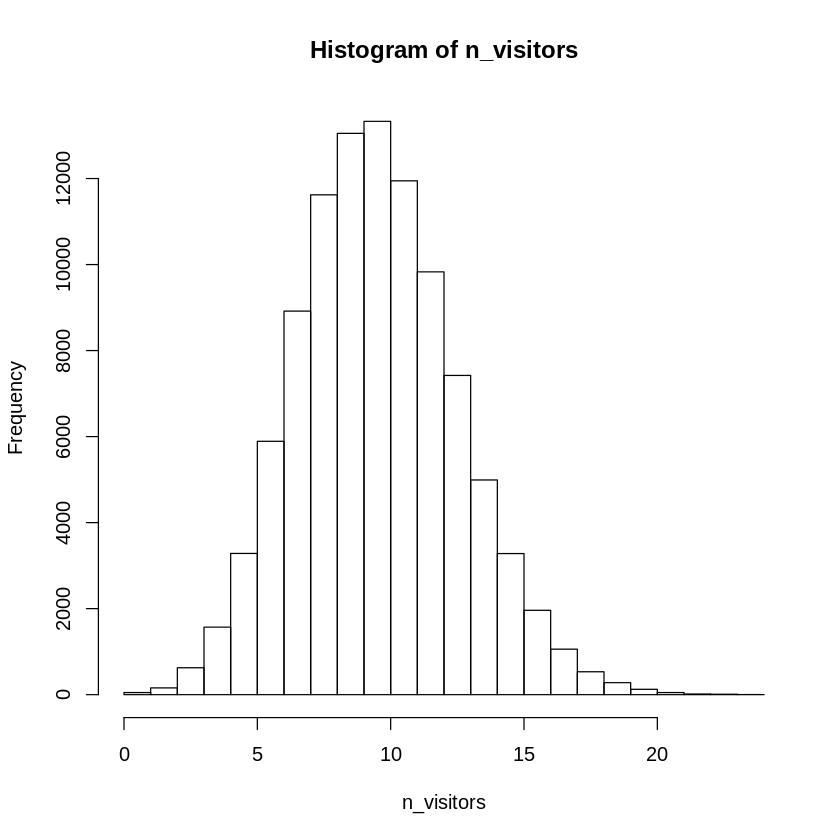

In [ ]:
# Fill in the parameters
n_samples <- 100000
n_ads_shown <- 100
proportion_clicks <- 0.1
n_visitors <- rbinom(n_samples, size = n_ads_shown, 
                     prob = proportion_clicks)

# Visualize n_visitors
hist(n_visitors)

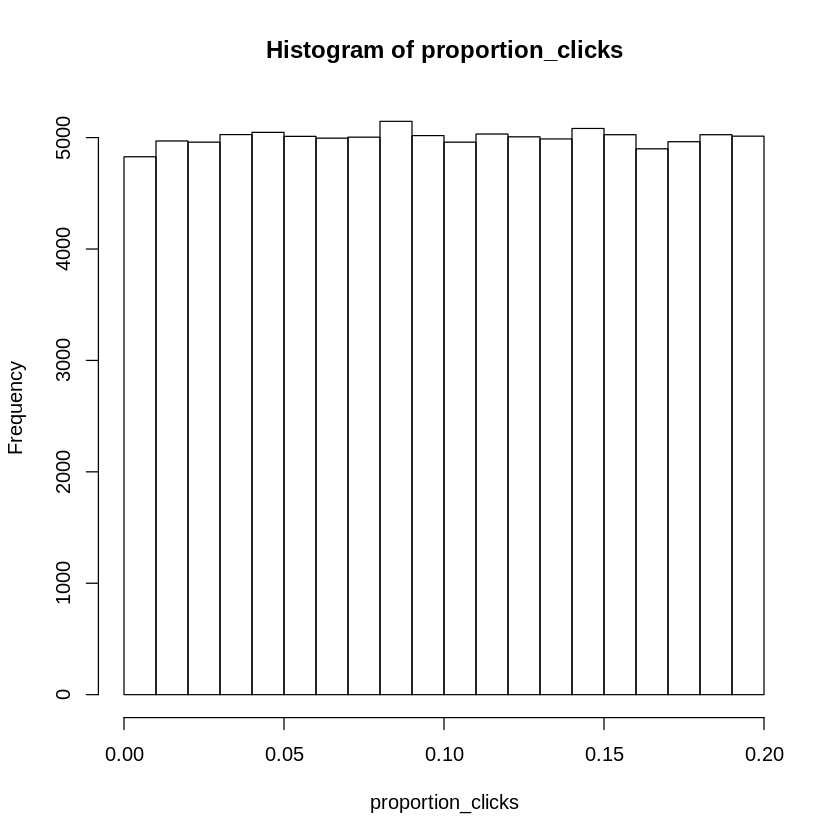

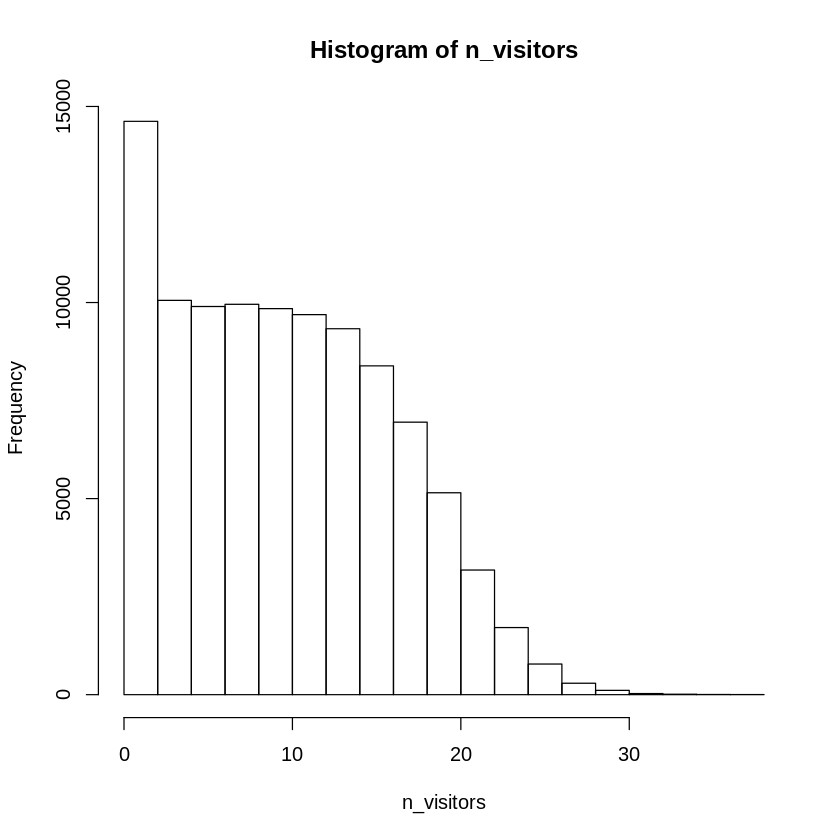

In [ ]:
# Update proportion_clicks
n_samples <- 100000
n_ads_shown <- 100
proportion_clicks <- runif(n=n_samples, min=0.0, max=0.2)
n_visitors <- rbinom(n = n_samples, size = n_ads_shown, prob = proportion_clicks)

# Visualize the results
hist(proportion_clicks)
hist(n_visitors)

In [ ]:
# Update proportion_clicks
n_samples <- 100000
n_ads_shown <- 100
proportion_clicks <- runif(n=n_samples, min=0.0, max=0.2)
n_visitors <- rbinom(n = n_samples, size = n_ads_shown, prob = proportion_clicks)

prior <- data.frame(proportion_clicks, n_visitors)

In [ ]:
head(prior)

,proportion_clicks,n_visitors
,<dbl>,<int>
1,0.07448017,11
2,0.01776359,1
3,0.10897083,11
4,0.14539059,12
5,0.04805518,5
6,0.16412358,21


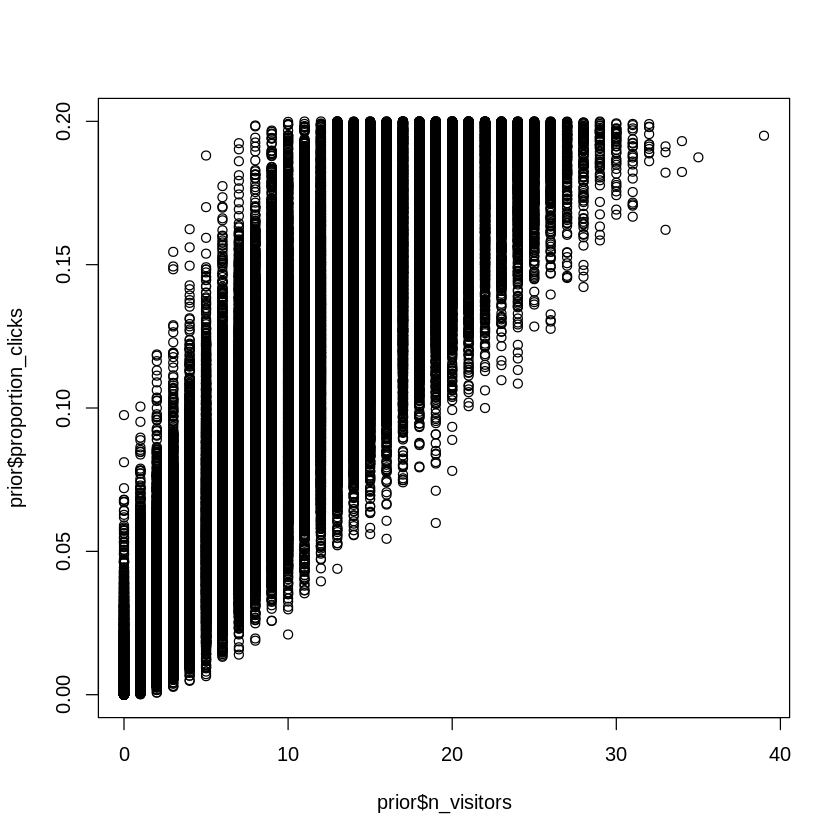

In [ ]:
plot(x=prior$n_visitors, y=prior$proportion_clicks)

,proportion_clicks,n_visitors
,<dbl>,<int>
1,0.07448017,11
2,0.01776359,1
3,0.10897083,11
4,0.14539059,12
5,0.04805518,5
6,0.16412358,21


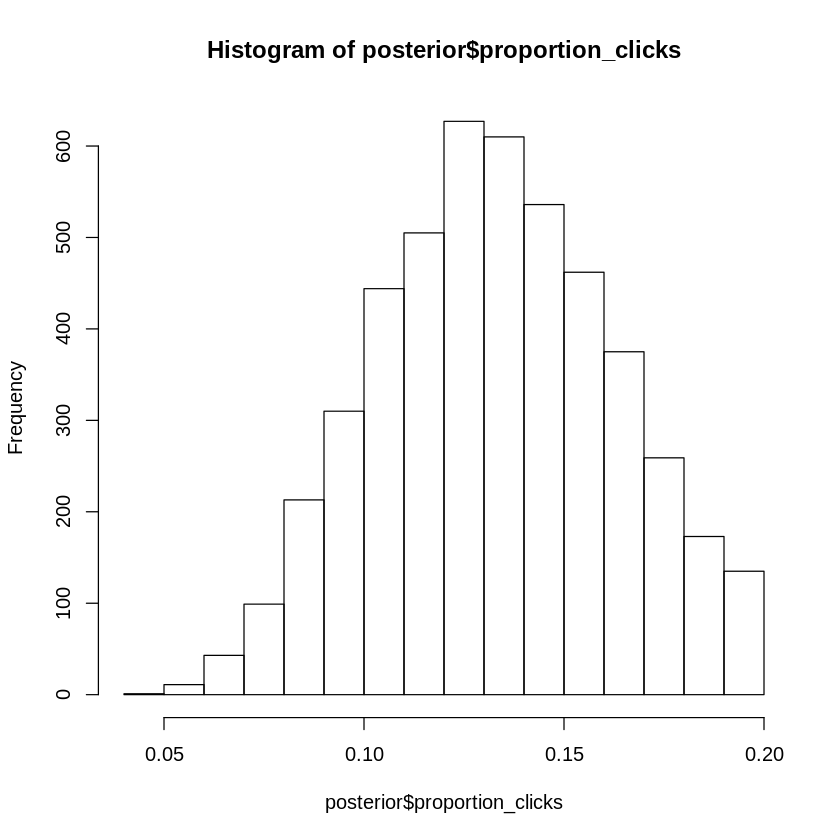

In [ ]:
prior <- data.frame(proportion_clicks, n_visitors)
head(prior)

# Create the posterior data frame
posterior <- prior[prior$n_visitors == 13, ]
hist(posterior$proportion_clicks)

,proportion_clicks,n_visitors
,<dbl>,<int>
97,0.1490760,13
117,0.1086878,13
138,0.1157036,13
145,0.1517618,13
219,0.1527272,13
253,0.1929554,13


[1] 0.9854258

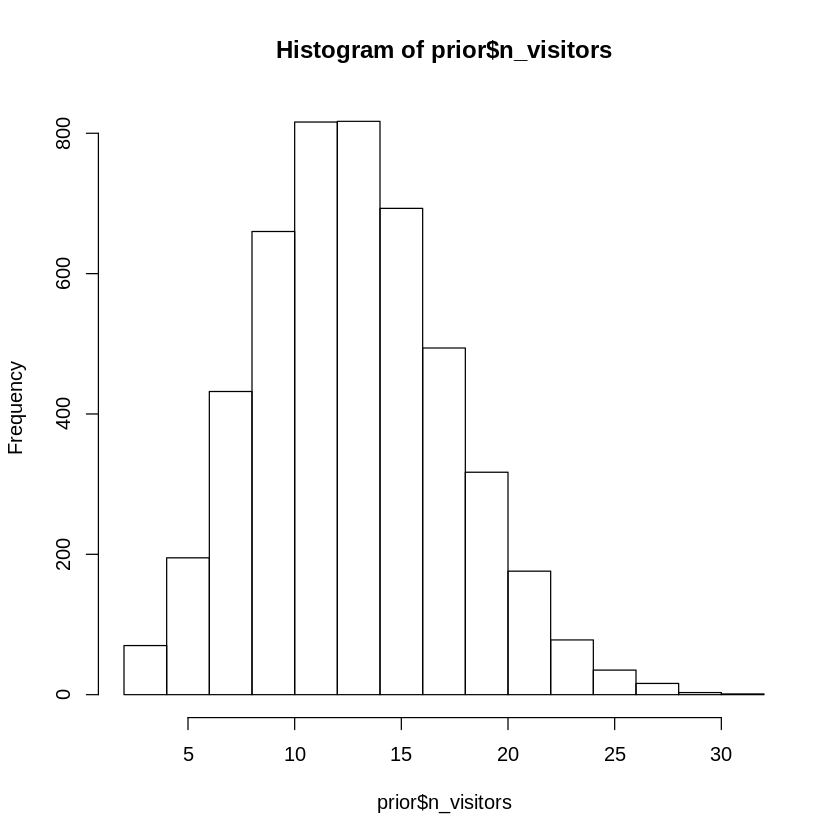

In [ ]:
# Assign posterior to a new variable called prior
prior <- posterior
# Take a look at the first rows in prior
head(prior)

# Replace prior$n_visitors with a new sample and visualize the result
n_samples <- nrow(prior)
n_ads_shown <-100
prior$n_visitors <- rbinom(n_samples, size=n_ads_shown, prob=prior$proportion_clicks)
hist(prior$n_visitors)
# Calculate the probability that you will get 5 or more visitors

sum(prior$n_visitors >=5) / length(prior$n_visitors)

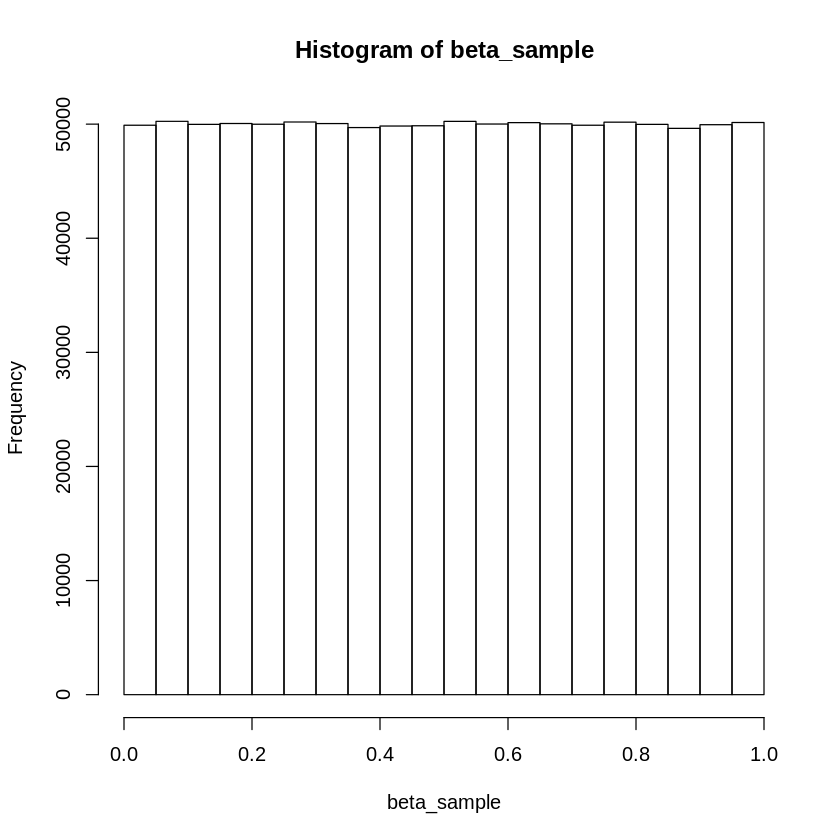

In [ ]:
# Explore using the rbeta function
beta_sample <- rbeta(n = 1000000, shape1 = 1, shape2 = 1)

# Visualize the results
hist(beta_sample)

[1] 0.8477227 0.7941524 0.8088273 0.8812024 0.8307974 0.7727641

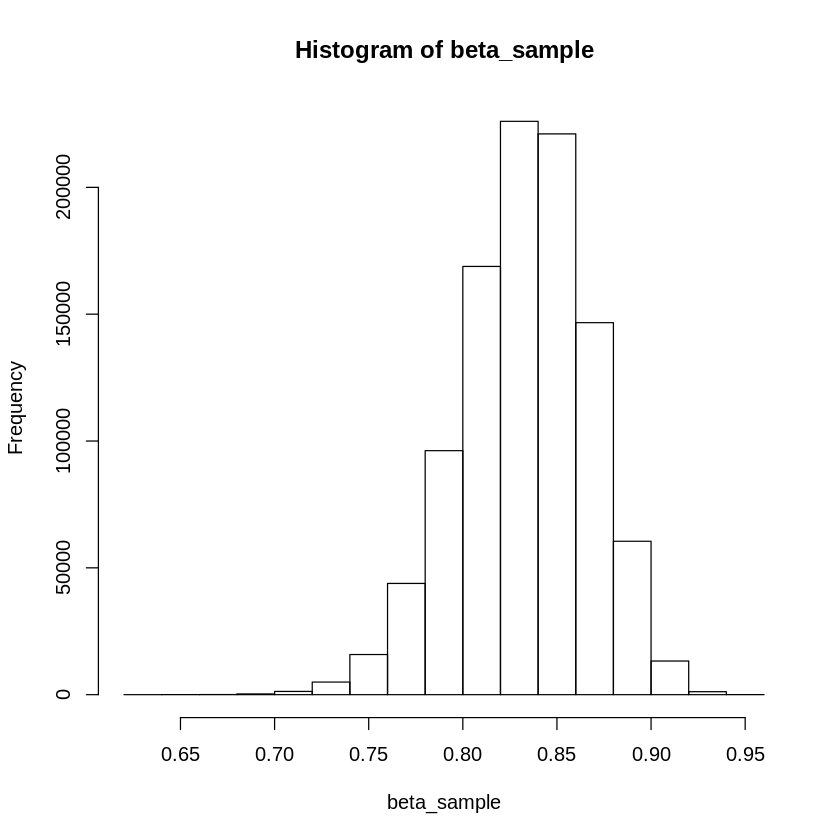

In [ ]:
# Explore using the rbeta function
beta_sample <- rbeta(n = 1000000, shape1 = 100, shape2 = 20)
head(beta_sample)
# Visualize the results
hist(beta_sample)

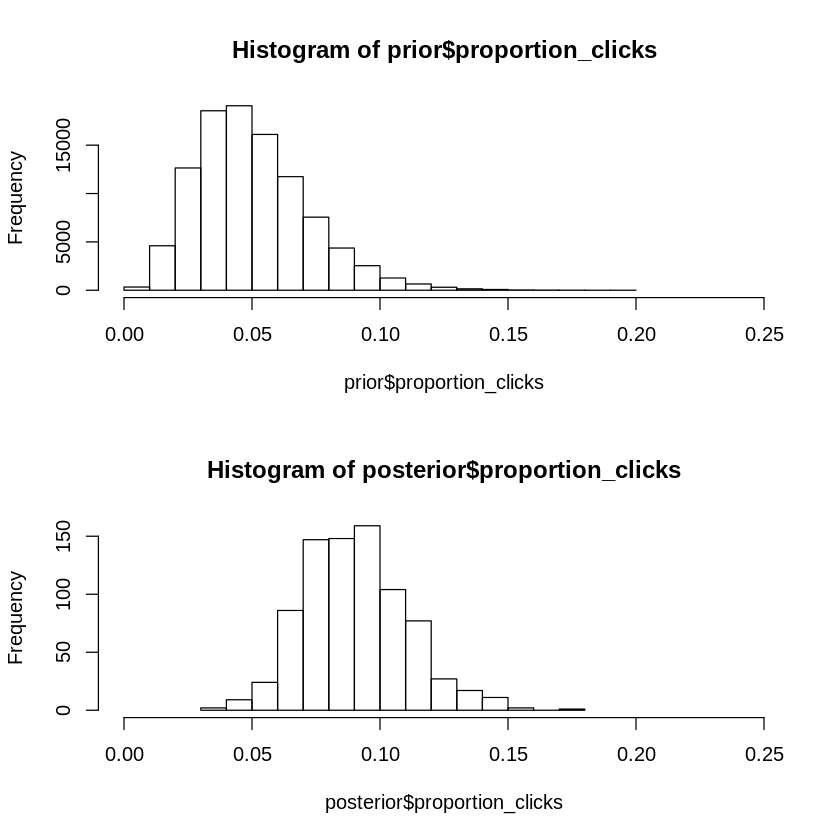

In [ ]:
n_draws <- 100000
n_ads_shown <- 100

# Change the prior on proportion_clicks
proportion_clicks <- rbeta(n_draws, shape1=5, shape2=95)
n_visitors <- rbinom(n_draws, size = n_ads_shown, prob = proportion_clicks)
prior <- data.frame(proportion_clicks, n_visitors)
posterior <- prior[prior$n_visitors == 13, ]

# This plots the prior and the posterior in the same plot
par(mfcol = c(2, 1))
hist(prior$proportion_clicks, 
     xlim = c(0, 0.25))
hist(posterior$proportion_clicks, 
     xlim = c(0, 0.25))

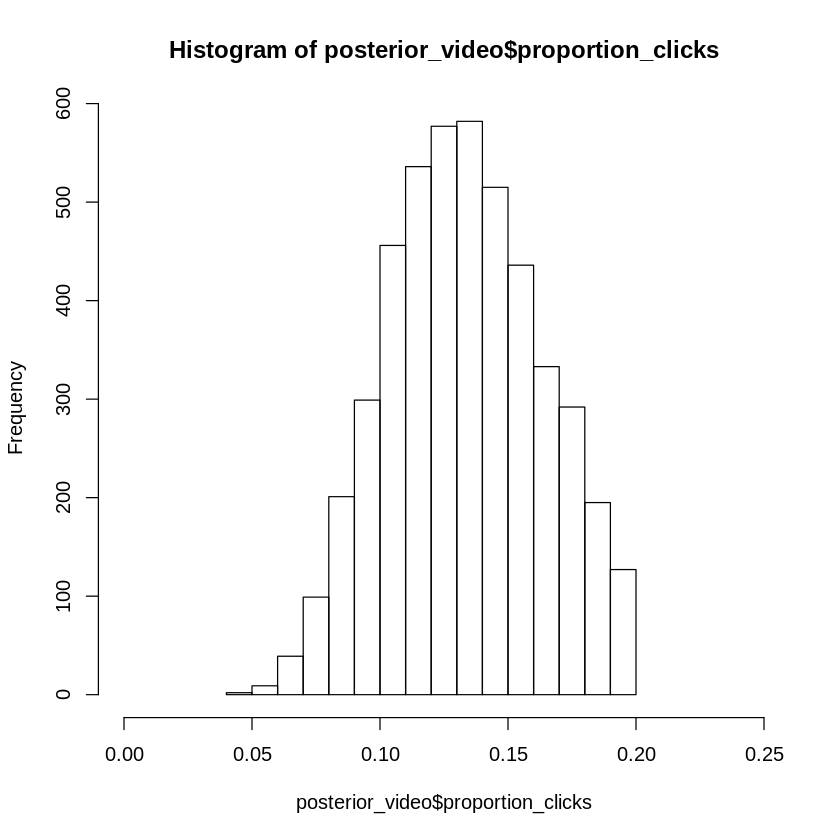

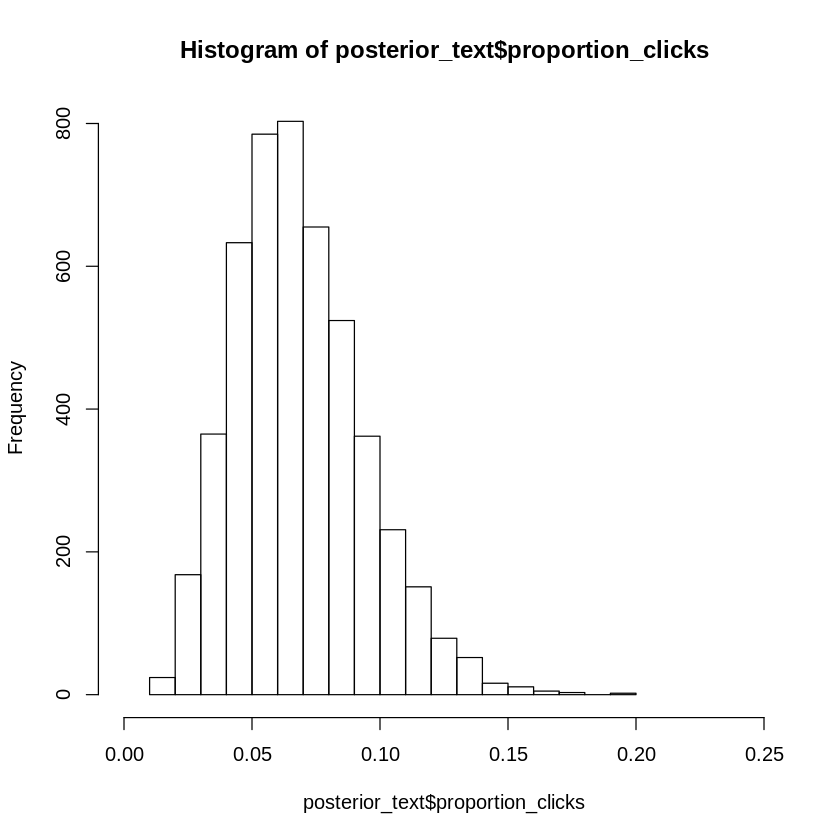

In [ ]:
# Define parameters
n_draws <- 100000
n_ads_shown <- 100
proportion_clicks <- runif(n_draws, min = 0.0, max = 0.2)
n_visitors <- rbinom(n = n_draws, size = n_ads_shown, 
                     prob = proportion_clicks)
prior <- data.frame(proportion_clicks, n_visitors)

# Create the posteriors for video and text ads
posterior_video <- prior[prior$n_visitors == 13, ]
posterior_text <- prior[prior$n_visitors == 6, ]

# Visualize the posteriors
hist(posterior_video$proportion_clicks, xlim = c(0, 0.25))
hist(posterior_text$proportion_clicks, xlim = c(0, 0.25))

[1] 0.06454945

[1] 0.94725

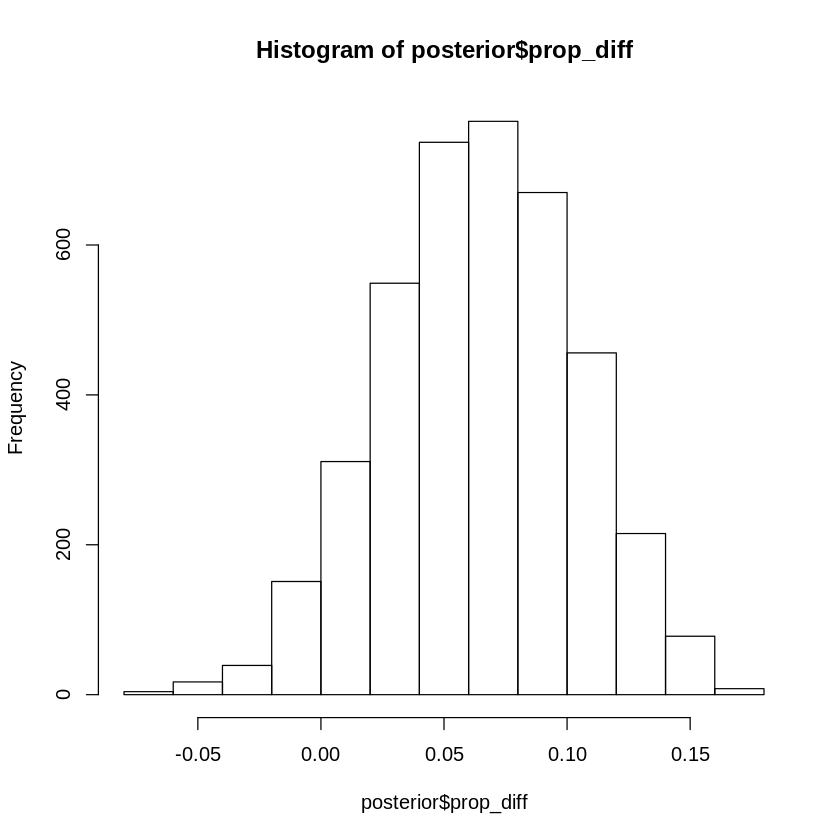

In [ ]:
posterior <- data.frame(video_prop = posterior_video$proportion_clicks[1:4000],
                        text_prop = posterior_text$proportion_click[1:4000])

# Calculate the posterior difference: video_prop - text_prop
posterior$prop_diff <- posterior$video_prop - posterior$text_prop 

# Visualize prop_diff
hist(posterior$prop_diff)

# Calculate the median of prop_diff
median(posterior$prop_diff)

# Calculate the proportion
sum(posterior$prop_diff > 0) / length(posterior$prop_diff)

In [ ]:
visitor_spend <- 2.53
video_cost <- 0.25
text_cost <- 0.05

# Add the column posterior$video_profit
posterior$video_profit <- n_visitors * (posterior$video_prop * visitor_spend + video_cost) 